<a href="https://colab.research.google.com/github/ss20648/CE888/blob/main/Lab%207/1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [1]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels_exp=train_labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 36s 5ms/step - loss: 0.4484 - accuracy: 0.8544 - val_loss: 0.0841 - val_accuracy: 0.9749
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.0461 - val_accuracy: 0.9858
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0347 - accuracy: 0.9880 - val_loss: 0.0447 - val_accuracy: 0.9868
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0413 - val_accuracy: 0.9883
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0385 - val_accuracy: 0.9910


#### evaluate model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0318 - accuracy: 0.9915


0.9915000200271606

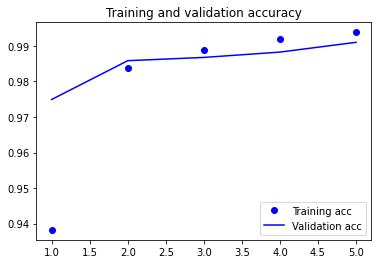

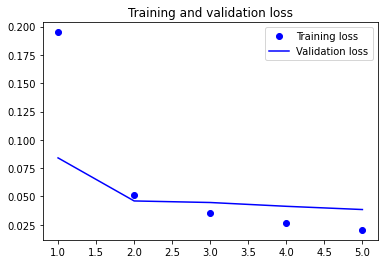

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [9]:
# Write code here

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(optimizer='Nadam', 
              loss='mean_squared_error',
              metrics=['accuracy'])
history = model1.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0901 - accuracy: 0.1106 - val_loss: 0.0900 - val_accuracy: 0.1060
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0900 - accuracy: 0.1144 - val_loss: 0.0900 - val_accuracy: 0.1060
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0900 - accuracy: 0.1137 - val_loss: 0.0900 - val_accuracy: 0.1060
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0900 - accuracy: 0.1135 - val_loss: 0.0900 - val_accuracy: 0.1060
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0900 - accuracy: 0.1135 - val_loss: 0.0900 - val_accuracy: 0.1060


In [10]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1135


0.11349999904632568

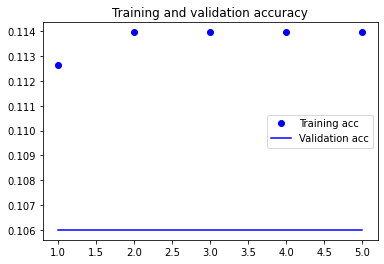

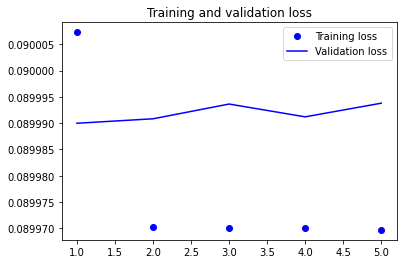

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Implementing Gridsearch

In [12]:
def build_model(optimizer):
  model1 = models.Sequential()
  model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model1.add(layers.MaxPooling2D((2, 2)))
  model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model1.add(layers.MaxPooling2D((2, 2)))
  model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model1.add(layers.Flatten())
  model1.add(layers.Dense(64, activation='relu'))
  model1.add(layers.Dense(10, activation='softmax'))

  model1.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  return model1

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from keras.wrappers.scikit_learn import KerasClassifier

In [14]:

param_grid = {
              'optimizer' : ['Adam', 'Adamax', 'Nadam'],
              'epochs':[1,2]
             }

model1 = KerasClassifier(build_fn=build_model, verbose=1)
resgrid = GridSearchCV(estimator=model1, param_grid=param_grid, n_jobs=-1, cv=3, scoring="accuracy")
resgrid = resgrid.fit(train_images, train_labels_exp)
print("Best: %f using %s" % (resgrid.best_score_, resgrid.best_params_))
means = resgrid.cv_results_['mean_test_score']
stds = resgrid.cv_results_['std_test_score']
params = resgrid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3403 - accuracy: 0.8936
Epoch 2/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0516 - accuracy: 0.9843
Best: 0.983483 using {'epochs': 2, 'optimizer': 'Nadam'}
0.976317 (0.003025) with: {'epochs': 1, 'optimizer': 'Adam'}
0.978267 (0.001236) with: {'epochs': 1, 'optimizer': 'Adamax'}
0.977967 (0.001312) with: {'epochs': 1, 'optimizer': 'Nadam'}
0.983050 (0.000147) with: {'epochs': 2, 'optimizer': 'Adam'}
0.981967 (0.001818) with: {'epochs': 2, 'optimizer': 'Adamax'}
0.983483 (0.000944) with: {'epochs': 2, 'optimizer': 'Nadam'}


In [15]:
params=resgrid.best_params_
acc=resgrid.best_score_

In [16]:
print(acc)
print(params)

0.9834833333333334
{'epochs': 2, 'optimizer': 'Nadam'}
